In [531]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


#  2. Data preperation

In [542]:
%load_ext autoreload
%aimport data_prep
%run data_prep.py
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load Datasets & Join both Datasets

In [533]:
train_data = pd.read_csv("original_datasets/training_set_values.csv")
train_labels = pd.read_csv("original_datasets/training_set_labels.csv")
test_data = pd.read_csv("original_datasets/test_set_values.csv")

#Join Labels with Train data
train_data = addLabelToTrainData(train_data, train_labels)
test_data['status_group'] = 'test'
#test_data.insert(0, 'My 2nd new column', 'default value 2')
train_data['is_test'] = 0
test_data['is_test'] = 1

data = pd.concat([train_data,test_data],ignore_index=True)

`status_group` added to train_data 



## Start Transformoing on a copy

In [534]:
data_transformed = data.copy()

### Impute Values 

Impute for Train

In [535]:
# Impute 0 for regions of 'Dodoma','Kagera','Mbeya','Tabora' this regions 0 ar actually missing values
data_transformed = amount_tsh_impute_regions(data_transformed)

amount_tsh imputed with mean for regions: ['Dodoma','Kagera','Mbeya','Tabora']


In [536]:
#Impute Latitude by the mean of the geographical areas (increasing order "subvillage", "ward", "lga", "district_code", "region", "basin")
data_transformed = impute_column(data_transformed, "latitude")


latitude imputed with mean


In [537]:
#Impute Longitude by the mean of the geographical areas (increasing order "subvillage", "ward", "lga", "district_code", "region", "basin")
data_transformed = impute_column(data_transformed, "longitude")

longitude imputed with mean


In [538]:
#Impute Population by the mean of the geographical areas (increasing order "subvillage", "ward", "lga", "district_code", "region", "basin")
data_transformed = impute_column(data_transformed, "population")


population imputed with mean


<p style="color:red;"> -------------------------- CHECKPOINT</p>
<p style="color:red;"> -------------------------- SAVE to FE folder</p>


In [539]:
data_transformed.to_csv("./FE_steps/1 train_data_imputed.csv", index=False)

In [540]:
data_transformed = pd.read_csv("./FE_steps/1 train_data_imputed.csv")

### Add Outside Data

In [543]:
data_transformed = density(data_transformed)

added densityn


### Conversions
#### Convert `construction_year`

In [108]:
# construction_year - converts it to years elapsed (AKA age) -- (zeroes ignored)
train_data_transformed = convert_construction_year(train_data_transformed)

`construction_year` converted to `age`, which is elapsed years (zeroes ignored) 



In [109]:
# construction_year - converts it to years elapsed (AKA age) -- (zeroes ignored)
test_data_transformed = convert_construction_year(test_data_transformed)

`construction_year` converted to `age`, which is elapsed years (zeroes ignored) 



#### Convert `date_recorded`

In [110]:
train_data_transformed = convert_date_recorded(train_data_transformed)

`date_recorded` converted to `days_since_recoreded`, which is elapsed days (zeroes ignored) 



In [111]:
test_data_transformed = convert_date_recorded(test_data_transformed)

`date_recorded` converted to `days_since_recoreded`, which is elapsed days (zeroes ignored) 



## Impute construction year

In [112]:
train_data_transformed = impute_construction_year(train_data_transformed)

age imputed mean


In [113]:
test_data_transformed = impute_construction_year(test_data_transformed)

age imputed mean


<p style="color:red;"> -------------------------- CHECKPOINT</p>
<p style="color:red;"> -------------------------- SAVE to FE folder</p>


In [114]:
train_data_transformed.to_csv("./FE_steps/2 train_data_density_age_recorded.csv", index=False)
test_data_transformed.to_csv("./FE_steps/2 test_data_density_age_recorded.csv", index=False)

In [115]:
train_data_transformed = pd.read_csv("./FE_steps/2 train_data_density_age_recorded.csv")
test_data_transformed = pd.read_csv("./FE_steps/2 test_data_density_age_recorded.csv")

### Binning

Try one iteration without binning

In [116]:
train_data_transformed = bin_feature(train_data_transformed, "days_since_recoreded", 8)

`days_since_recoreded` has been binned to 8 categories:
IntervalIndex([(1922.999, 2195.0], (2195.0, 2220.0], (2220.0, 2240.0], (2240.0, 2342.0], (2342.0, 2789.0], (2789.0, 2900.0], (2900.0, 2919.0], (2919.0, 5991.0]]
              closed='right',
              dtype='interval[float64]')




Text(0, 0.5, 'Percentage')

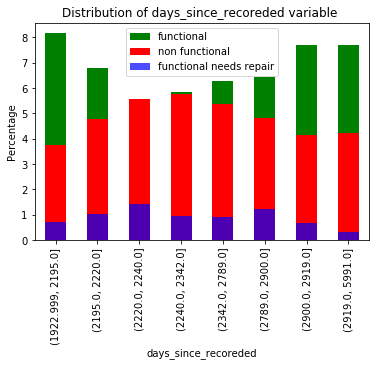

In [117]:
plt.pyplot.show()
ax = ((train_data_transformed[train_data_transformed.status_group=='functional'].days_since_recoreded.value_counts().sort_index()/len(train_data_transformed.status_group))*100).plot(kind='bar',color='g', x='days_since_recoreded')
((train_data_transformed[train_data_transformed.status_group=='non functional'].days_since_recoreded.value_counts().sort_index()/len(train_data_transformed.status_group))*100).plot(kind='bar',color='r', x='days_since_recoreded')
((train_data_transformed[train_data_transformed.status_group=='functional needs repair'].days_since_recoreded.value_counts().sort_index()/len(train_data_transformed.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='days_since_recoreded')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of days_since_recoreded variable ')
plt.pyplot.xlabel('days_since_recoreded')
plt.pyplot.ylabel('Percentage')

In [118]:
test_data_transformed = bin_feature(test_data_transformed, "days_since_recoreded", 8)

`days_since_recoreded` has been binned to 8 categories:
IntervalIndex([(1922.999, 2196.0], (2196.0, 2221.0], (2221.0, 2241.0], (2241.0, 2345.0], (2345.0, 2790.0], (2790.0, 2901.0], (2901.0, 2920.0], (2920.0, 6558.0]]
              closed='right',
              dtype='interval[float64]')




### Add distance to capital

In [119]:
train_data_transformed = distance_capital(train_data_transformed)

added distance to capital


In [120]:
test_data_transformed = distance_capital(test_data_transformed)

added distance to capital


<p style="color:red;"> -------------------------- CHECKPOINT</p>
<p style="color:red;"> -------------------------- SAVE to FE folder</p>


In [121]:
train_data_transformed.to_csv("FE_steps/3 train_data_binning_distance.csv", index=False)
test_data_transformed.to_csv("FE_steps/3 test_data_binning_distance.csv", index=False)

In [122]:
train_data_transformed = pd.read_csv("FE_steps/3 train_data_binning_distance.csv")
test_data_transformed = pd.read_csv("FE_steps/3 test_data_binning_distance.csv")

### Shortlisting columns

Shortlist Trainning set columns

In [95]:
train_data_transformed = train_data.copy()


# installer
train_data_transformed = shortlist_installer(train_data_transformed)

# funder
train_data_transformed = shortlist_funder(train_data_transformed)

# lga
train_data_transformed = shortlist_lga(train_data_transformed)

# extraction_type
train_data_transformed = shortlist_extraction_type(train_data_transformed)

#scheme_management
train_data_transformed = shortlist_scheme_management(train_data_transformed)

#region_code
train_data_transformed = shortlist_region_code(train_data_transformed)




`installer` shortlisted to {'Commu', 'DANIDA', 'DWE', 'Government', 'RWE', 'other'} only 

`funder` shortlisted to {'Government Of Tanzania','Danida','Hesawa','Rwssp','World Bank','Kkkt','World Vision','Unicef','Tasaf','District Council', 'other'} only 

`lga` shortlisted to {'Njombe','Arusha Rural','Moshi Rural','Bariadi','Rungwe','Kilosa','Kasulu','Mbozi','Meru','Bagamoyo', 'other'} only 

`extraction_type` shortlisted to {'gravity','nira/tanira','submersible','swn 80','mono','india mark ii','afridev','ksb', 'other'} only 

`scheme_management` shortlisted to {'VWC','WUG','Water authority','WUA','Water Board','Parastatal','Private operator','Company', 'other'} only 

`region_code` shortlisted to {11,17,12,3,5,18,19,2,16,10,4,1,13,14,20, 'other'} only 



Shortlist test set columns

In [96]:
test_data_transformed = test_data.copy()


# installer
test_data_transformed = shortlist_installer(test_data_transformed)

# funder
test_data_transformed = shortlist_funder(test_data_transformed)

# lga
test_data_transformed = shortlist_lga(test_data_transformed)

# extraction_type
test_data_transformed = shortlist_extraction_type(test_data_transformed)

#scheme_management
test_data_transformed = shortlist_scheme_management(test_data_transformed)

#region_code
test_data_transformed = shortlist_region_code(test_data_transformed)




`installer` shortlisted to {'Commu', 'DANIDA', 'DWE', 'Government', 'RWE', 'other'} only 

`funder` shortlisted to {'Government Of Tanzania','Danida','Hesawa','Rwssp','World Bank','Kkkt','World Vision','Unicef','Tasaf','District Council', 'other'} only 

`lga` shortlisted to {'Njombe','Arusha Rural','Moshi Rural','Bariadi','Rungwe','Kilosa','Kasulu','Mbozi','Meru','Bagamoyo', 'other'} only 

`extraction_type` shortlisted to {'gravity','nira/tanira','submersible','swn 80','mono','india mark ii','afridev','ksb', 'other'} only 

`scheme_management` shortlisted to {'VWC','WUG','Water authority','WUA','Water Board','Parastatal','Private operator','Company', 'other'} only 

`region_code` shortlisted to {11,17,12,3,5,18,19,2,16,10,4,1,13,14,20, 'other'} only 



### Fixing the Skewness

In [123]:
temp = train_data_transformed[['amount_tsh', 'gps_height', 'population', 'age','density']]
train_data_transformed = train_data_transformed.drop(columns = ['amount_tsh', 'gps_height', 'population', 'age','density'])

#fix skewness
feature_skewness(temp)
temp = fix_skewness(temp)

In [124]:
train_data_transformed = train_data_transformed.join(temp)

## Dropping Cols

In [ ]:
data = dropCols(data)

# Correlation matrix

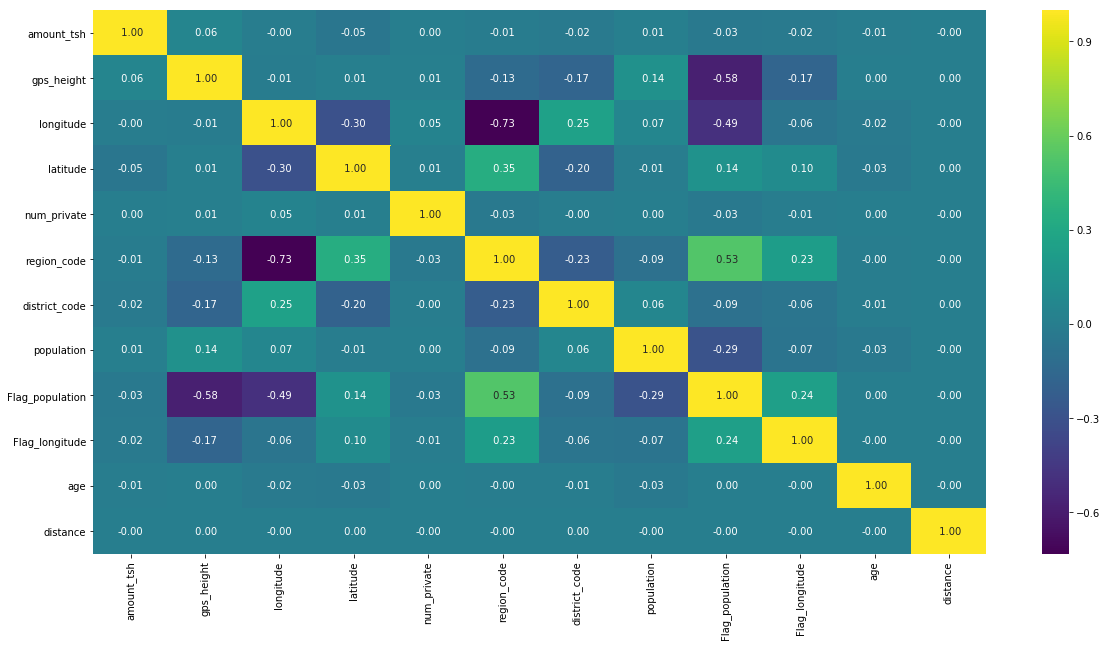

In [128]:
plt.pyplot.figure(figsize=(20,10))
sns.heatmap(train_data_transformed.corr(),cbar=True,fmt =' .2f', annot=True, cmap='viridis')

#  Save Data

In [129]:
#train_data_transformed.status_group.replace(['functional', 'non functional','functional needs repair'], [1, 2, 3], inplace=True)
labels_prepared = train_data_transformed[["status_group"]]
train_data_transformed = train_data_transformed.drop(columns=["status_group"])

#train_data_transformed = onehot_encode(train_data_transformed)
train_data_transformed.to_csv("./FE_Final/train_data_prepared.csv", index=False)
test_data_transformed.to_csv("./FE_Final/test_data_prepared.csv", index=False)